In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("spam.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [5]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
data.shape

(5572, 5)

# Data Cleaning

In [7]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
data.sample()

,v1,v2
589,ham,"I'm in a meeting, call me later at"


In [9]:
data.rename(columns={'v1':'label',
                    'v2':'text'},inplace=True)
data.sample(5)

,label,text
5436,ham,Mode men or have you left.
368,ham,Wat uniform? In where get?
1614,ham,Me sef dey laugh you. Meanwhile how's my darli...
1664,ham,�� v ma fan...
4449,ham,"Awesome, be there in a minute"


In [10]:
from sklearn.preprocessing import LabelEncoder
lE=LabelEncoder()

In [11]:
data['label']=lE.fit_transform(data['label'])

In [12]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data=data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(5169, 2)

# EDA

In [18]:
data['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

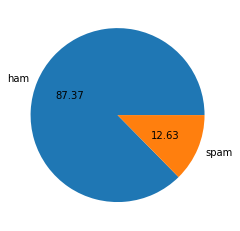

In [19]:
plt.pie(data['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


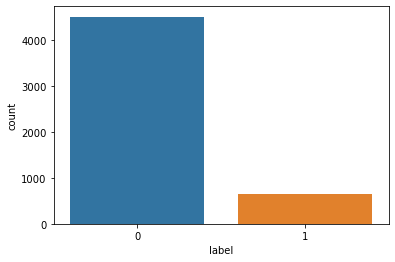

In [20]:
sns.countplot(data['label'])
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
data['num_character']=data['text'].apply(len)

In [24]:
data.shape

(5169, 3)

In [25]:
data.head()

,label,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
data['word_count']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
data.head()

,label,text,num_character,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
data['sent_count']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
data.head()

,label,text,num_character,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
data[['num_character','word_count','sent_count']].describe()

,num_character,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


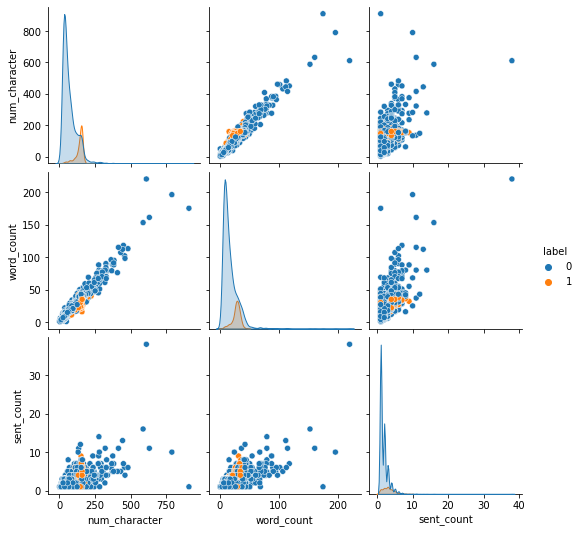

In [31]:
sns.pairplot(data,hue='label')

<AxesSubplot:>

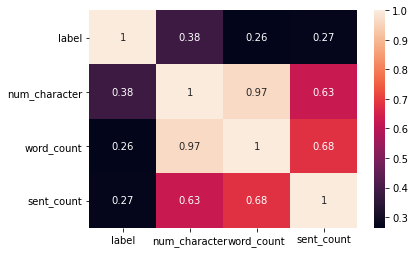

In [32]:
sns.heatmap(data.corr(),annot=True)

In [33]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps=PorterStemmer()

In [34]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
            
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

            
    return " ".join(y)

In [35]:
data['text']=data['text'].apply(lambda x:text_transform(x))

In [36]:
data['text'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: text, dtype: object

In [37]:
from wordcloud import WordCloud

In [38]:
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='black')

In [39]:
spam_wc=wc.generate(data[data['label']==1]['text'].str.cat(sep=' '))

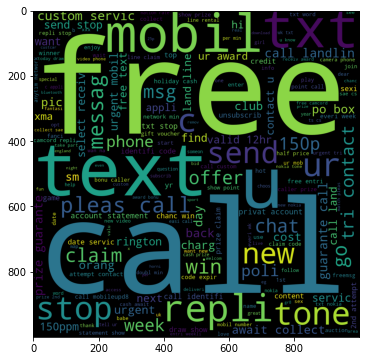

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

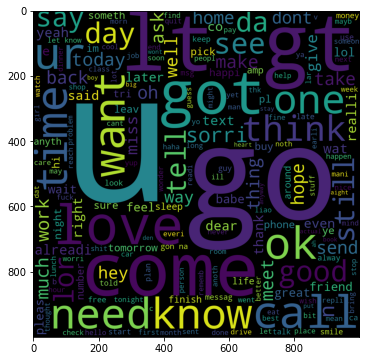

In [41]:
ham_wc=wc.generate(data[data['label']==0]['text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [42]:
spam_corpus=[]
for i in data[data['label']==1]['text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9941

In [44]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [46]:
X=tfidf.fit_transform(data['text']).toarray()

In [47]:
X.shape

(5169, 3000)

In [48]:
y=data['label'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [76]:
gnb=GaussianNB()
mnb1=MultinomialNB()
bnb=BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
pred_gnb=gnb.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [56]:
print(accuracy_score(y_test,pred_gnb))
print('\n')
print(precision_score(y_test,pred_gnb))
print('\n')
print(confusion_matrix(y_test,pred_gnb))

0.8600902643455834


0.48656716417910445


[[1171  172]
 [  45  163]]


In [77]:
mnb1.fit(X_train,y_train)
pred_mnb=mnb1.predict(X_test)
print(accuracy_score(y_test,pred_mnb))
print('\n')
print(precision_score(y_test,pred_mnb))
print('\n')
print(confusion_matrix(y_test,pred_mnb))

0.9658284977433914


0.9936305732484076


[[1342    1]
 [  52  156]]


In [58]:
bnb.fit(X_train,y_train)
pred_bnb=bnb.predict(X_test)
print(accuracy_score(y_test,pred_bnb))
print('\n')
print(precision_score(y_test,pred_bnb))
print('\n')
print(confusion_matrix(y_test,pred_bnb))

0.9716312056737588


0.9767441860465116


[[1339    4]
 [  40  168]]


In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost
ERROR: No matching distribution found for xgboost


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9671179883945842
Precision -  0.9385474860335196
For  KN
Accuracy -  0.9084461637653127
Precision -  0.9583333333333334
For  NB
Accuracy -  0.9658284977433914
Precision -  0.9936305732484076
For  DT
Accuracy -  0.927143778207608
Precision -  0.8518518518518519
For  LR
Accuracy -  0.9426176660219213
Precision -  0.8940397350993378
For  RF
Accuracy -  0.9658284977433914
Precision -  0.9813664596273292
For  AdaBoost
Accuracy -  0.9626047711154094
Precision -  0.96875
For  BgC
Accuracy -  0.9535783365570599
Precision -  0.8695652173913043
For  ETC
Accuracy -  0.9696969696969697
Precision -  0.9763313609467456
For  GBDT
Accuracy -  0.9471308833010961
Precision -  0.95


In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [66]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.965828,0.993631
5,RF,0.965828,0.981366
8,ETC,0.969697,0.976331
6,AdaBoost,0.962605,0.968750
1,KN,0.908446,0.958333
9,GBDT,0.947131,0.950000
0,SVC,0.967118,0.938547
4,LR,0.942618,0.894040
7,BgC,0.953578,0.869565
3,DT,0.927144,0.851852


In [67]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [68]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.965828
1,RF,Accuracy,0.965828
2,ETC,Accuracy,0.969697
3,AdaBoost,Accuracy,0.962605
4,KN,Accuracy,0.908446
5,GBDT,Accuracy,0.947131
6,SVC,Accuracy,0.967118
7,LR,Accuracy,0.942618
8,BgC,Accuracy,0.953578
9,DT,Accuracy,0.927144


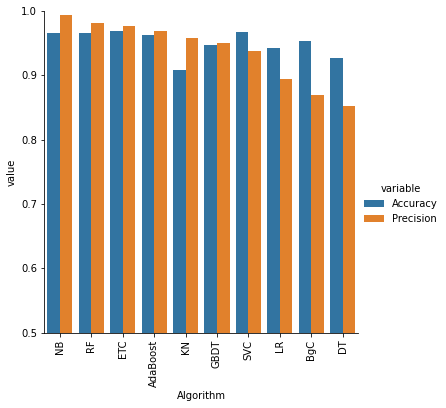

In [69]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [72]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9780786589297228
Precision 0.9887640449438202


In [74]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9774339136041263
Precision 0.9481865284974094


In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb1,open('model.pkl','wb'))